In [1]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import itertools

import dionysus as ds

In [101]:
# matFilename = './Data/2018-04-12_batchdata_updated_struct_errorcorrect.mat'
matFilename = './Data/2017-05-12_batchdata_updated_struct_errorcorrect.mat'
f = h5py.File(matFilename)

In [4]:
scaler = StandardScaler()

In [102]:
f.keys()

<KeysViewHDF5 ['#refs#', '#subsystem#', 'batch', 'batch_date']>

In [103]:
bat =  f['batch']
bat_date = f['batch_date']

In [165]:
f[bat['policy_readable'][4,0]].value.tobytes()[::2].decode()
# f[bat['cycle_life'][3,0]].value
# f[bat['barcode'][3,0]].value#.tobytes()#[::2].decode()
# f[bat['policy'][3,0]].value

/Users/tianmuzhang/miniconda/envs/scitfcpy36_dy/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


'4C(80%)-4C'

In [166]:
cycles = f[bat['cycles'][4,0]]
cycles['I'].shape#[0]

(1226, 1)

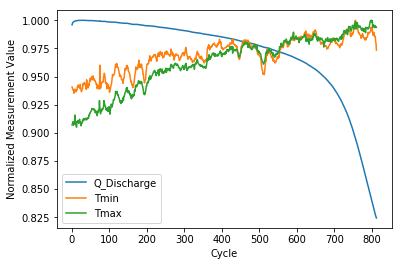

In [28]:
i = 20
summary_IR = np.hstack(f[bat['summary'][i,0]]['IR'][0,:].tolist())
summary_QC = np.hstack(f[bat['summary'][i,0]]['QCharge'][0,:].tolist())
summary_QD = np.hstack(f[bat['summary'][i,0]]['QDischarge'][0,:].tolist())
summary_TA = np.hstack(f[bat['summary'][i,0]]['Tavg'][0,:].tolist())
summary_TM = np.hstack(f[bat['summary'][i,0]]['Tmin'][0,:].tolist())
summary_TX = np.hstack(f[bat['summary'][i,0]]['Tmax'][0,:].tolist())
summary_CT = np.hstack(f[bat['summary'][i,0]]['chargetime'][0,:].tolist())
summary_CY = np.hstack(f[bat['summary'][i,0]]['cycle'][0,:].tolist())
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(summary_CY, summary_QD/np.max(summary_QD), label='Q_Discharge')
ax4.plot(summary_CY, summary_TM/np.max(summary_TM), label='Tmin')
ax4.plot(summary_CY, summary_TX/np.max(summary_TX), label='Tmax')
# plt.plot(summary_IR, summary_IR/np.max(summary_IR))
ax4.set_xlabel('Cycle')
ax4.set_ylabel('Normalized Measurement Value')
ax4.legend(loc='lower left')
fig4.savefig('./figs/cyc_meas', bbox_inches='tight')

In [22]:
bat.keys()
bat['policy_readable'][3][0]
f[bat[]]

<HDF5 object reference>

In [8]:
bat['summary']

<HDF5 dataset "summary": shape (46, 1), type "|O">

In [107]:
print(f[bat['cycle_life'][0,0]][()])
summary_IR = np.hstack(f[bat['summary'][45,0]]['IR'][0,:].tolist())
summary_CY = np.hstack(f[bat['summary'][3,0]]['cycle'][0,:].tolist())
# summary_CY = 
np.hstack(f[bat['cycle_life'][40,0]])

[[1190.]]


array([966.])

In [108]:
summary_CY

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.223e+03, 1.224e+03,
       1.225e+03])

In [7]:
main_col_list = ['I', 'V', 'Qc', 'Qd', 'T']

In [9]:
cycles = f[bat['cycles'][20,0]]
cycles2 = f[bat['cycles'][20,0]]
cycles3 = f[bat['cycles'][45,0]]

In [6]:
cycles.keys()

<KeysViewHDF5 ['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'discharge_dQdV', 't']>

In [167]:
cycle_dict = {}
cycle_dict_pd = {}
cycle_dict_pdstd = {}
for j in range(cycles['I'].shape[0]):
    I = np.hstack((f[cycles['I'][j,0]].value))
    I_sdd = (I-np.mean(I)) / np.std(I)
    
    Qc = np.hstack((f[cycles['Qc'][j,0]].value))
    Qc_sdd = (Qc-np.mean(Qc)) / np.std(Qc)
    
    Qd = np.hstack((f[cycles['Qd'][j,0]].value))
    Qd_sdd = (Qd-np.mean(Qd)) / np.std(Qd)
    
    Qdlin = np.hstack((f[cycles['Qdlin'][j,0]].value))
    
    T = np.hstack((f[cycles['T'][j,0]].value))
    T_sdd = (T-np.mean(T)) / np.std(T)
    
    Tdlin = np.hstack((f[cycles['Tdlin'][j,0]].value))
    
    V = np.hstack((f[cycles['V'][j,0]].value))
    V_sdd = (V-np.mean(V)) / np.std(V)
    
    dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]].value))
    
    t = np.hstack((f[cycles['t'][j,0]].value))
    
    cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
    cycle_dict[str(j)] = cd
    cycle_dict_pd[str(j)] = pd.DataFrame(data=np.array([I, V, Qc, Qd, T]).T, 
                                         index=t,
                                         columns=['I', 'V', 'Qc', 'Qd', 'T'])
    cycle_dict_pdstd[str(j)] = pd.DataFrame(data=np.array([I_sdd, V_sdd, Qc_sdd, Qd_sdd, T_sdd]).T, 
                                         index=t,
                                         columns=['I', 'V', 'Qc', 'Qd', 'T'])

/Users/tianmuzhang/miniconda/envs/scitfcpy36_dy/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/tianmuzhang/miniconda/envs/scitfcpy36_dy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/tianmuzhang/miniconda/envs/scitfcpy36_dy/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/tianmuzhang/miniconda/envs/scitfcpy36_dy/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/Users/tianmuzhang/miniconda/envs/scitfcpy36_dy/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/Users/tianmuzhang/miniconda/envs/scitfcpy36_dy/lib/python3.6/site-pack

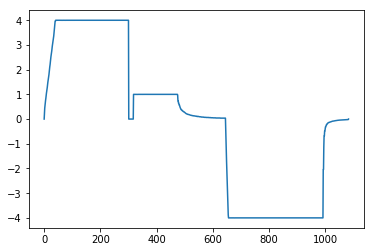

In [178]:
plt.plot(cycle_dict['102']['I'])
# cycle_dict['100']['I']

In [142]:
cls_lbl_all = pd.DataFrame(index=range(cycles['I'].shape[0]),
                           columns=['I', 'V', 'Qc', 'Qd', 'T'])
clustering = DBSCAN(eps=.45, min_samples=0, metric='precomputed')
# for ii in range(itr_num):
#     tt = rll_corr.dropna()
#     clustering.fit(1-tt.iloc[ii*5:ii*5+5])
#     cls_lbl_all.loc[tt.iloc[ii*5:ii*5+5].index.tolist()[0][0]] = clustering.labels_
    
for j in range(cycles['I'].shape[0]):
    cyc_sel = j
    rad_df = np.random.normal(0, .000001, np.shape(cycle_dict_pd[str(cyc_sel)]))
    nsy_df = cycle_dict_pdstd[str(cyc_sel)].add(rad_df)
#     rll_corr = nsy_df.rolling(50).corr()
    rll_corr = nsy_df.corr()
    clustering.fit(1-rll_corr)
    cls_lbl_all.iloc[j, :] = clustering.labels_

In [189]:
# cls_lbl_all
# clustering.labels_
# rll_corr

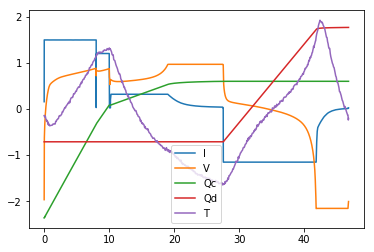

In [62]:
# cycles.keys()
# len(cycle_dict)
# cycles['I'].shape[0]
# cycles['I'].shape[0]
cycle_dict_pdstd['100'].plot()

In [315]:
# I_sdd = (I-np.mean(I)) / np.std(I)
# T_sdd = (T-np.mean(T)) / np.std(T)
# cycle_dict_pdstd['400']

In [30]:
# 1 - cycle_dict_pdstd['490'].corr()
# np.shape(cycle_dict_pd['100'])
# cyc_sel = 1
cyc_sel = 810
# rad_df = pd.DataFrame(np.random.normal(0, .0001, np.shape(cycle_dict_pd[str(cell_sel)])))
rad_df = np.random.normal(0, .000001, np.shape(cycle_dict_pd[str(cyc_sel)]))

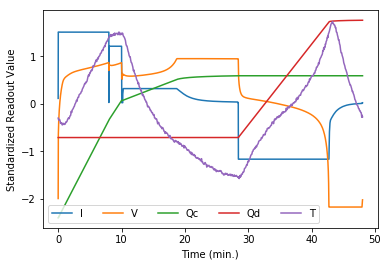

In [227]:
# len(cycle_dict['100']['T'])
# cycle_dict['100']['dQdV']
# for kk in ['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin','V', 'dQdV', 't']:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
for colll in ['I', 'V', 'Qc', 'Qd', 'T']:
#     ax1.plot(cycle_dict_pdstd['810'][colll])
    ax1.plot(cycle_dict_pdstd[str(cyc_sel)][colll])
ax1.legend(loc='lower left', ncol=5)
ax1.set_xlabel('Time (min.)')
ax1.set_ylabel('Standardized Readout Value')
fig1.savefig('./figs/meas_eg20_'+str(cyc_sel), bbox_inches='tight', dpi=200)
fig1.savefig('./figs/meas_eg20_'+str(cyc_sel)+'.svg', bbox_inches='tight',)

In [31]:
# nsy_df = rad_df.add(cycle_dict_pdstd[str(cell_sel)],)
nsy_df = cycle_dict_pdstd[str(cyc_sel)].add(rad_df)
# cycle_dict_pd[str(cell_sel)].iloc[-50:-1, :].corr()
# cycle_dict_pdstd[str(cell_sel)].iloc[-50:-1, :].corr()
# 1- nsy_df.iloc[1:21, :].corr()
# clustering = DBSCAN(eps=.3, min_samples=0).fit(1- nsy_df.iloc[-50:, :].corr())

In [32]:
# rll_corr = cycle_dict_pd[str(cell_sel)].rolling(20).corr(pairwise=True)
rll_corr = nsy_df.rolling(50).corr()

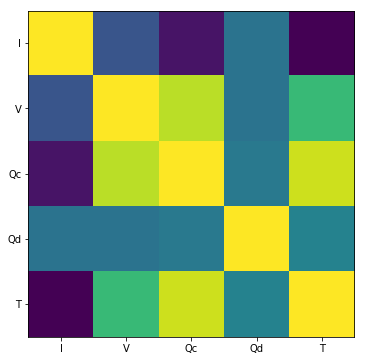

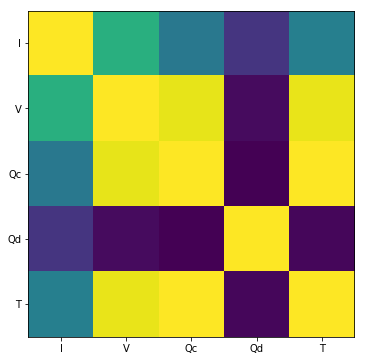

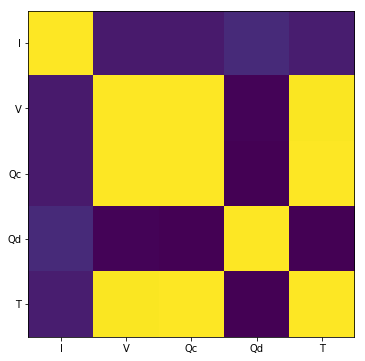

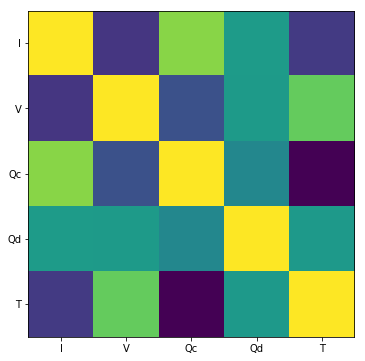

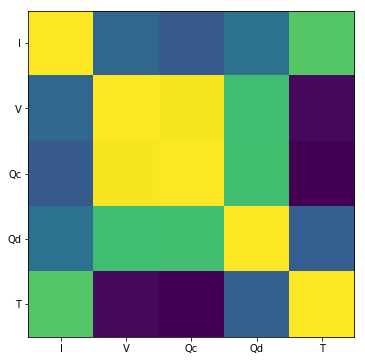

In [14]:
# cycle_dict_pdstd[str(cell_sel)].iloc[-50:-1, :]
# clustering.labels_
for ii in [100, 150, 200, 250, 300]:
    fig2 = plt.figure(figsize=(6,6))
    ax2 = fig2.add_subplot(111)
    ax2.imshow(rll_corr.iloc[ii*5:ii*5+5])
    ax2.set_xticklabels(['']+['I', 'V', 'Qc', 'Qd', 'T'])
    ax2.set_yticklabels(['']+['I', 'V', 'Qc', 'Qd', 'T'])
#     fig2.savefig('./figs/corr/corr_eg_'+str(ii), bbox_inches='tight', dpi=150)
# ['I', 'V', 'Qc', 'Qd', 'T']

In [33]:
itr_num = int(rll_corr.dropna().shape[0]/5)
cls_lbl_all = pd.DataFrame(columns=['I', 'V', 'Qc', 'Qd', 'T'])
clustering = DBSCAN(eps=.3, min_samples=0, metric='precomputed')
tt = rll_corr.dropna()
for ii in range(itr_num):
    clustering.fit(1-tt.iloc[ii*5:ii*5+5])
    cls_lbl_all.loc[tt.iloc[ii*5:ii*5+5].index.tolist()[0][0]] = clustering.labels_
#     print(clustering.labels_)

In [145]:
# cls_lbl_all
# rll_corr

In [231]:
tt = rll_corr.dropna().iloc[5:15]#.copy(deep=True).iloc[5:15]#.copy()
tt.index.tolist()
# nsy_df.iloc[0:50]
# rll_corr.dropna().iloc[ii*5:ii*5+5].index.tolist()[0][0]

[(0.19861833333343384, 'I'),
 (0.19861833333343384, 'V'),
 (0.19861833333343384, 'Qc'),
 (0.19861833333343384, 'Qd'),
 (0.19861833333343384, 'T'),
 (0.2091699999999643, 'I'),
 (0.2091699999999643, 'V'),
 (0.2091699999999643, 'Qc'),
 (0.2091699999999643, 'Qd'),
 (0.2091699999999643, 'T')]

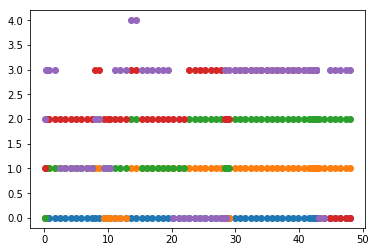

In [232]:
plt.plot(cls_lbl_all[::10], 'o', linestyle='')

In [34]:
# function for retrieving indices of the value in a list
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

In [35]:
# cls_lbl2 = ['I', 'V', 'Qc', 'Qd', 'T']
cls_lbl2 = []
for cbs in list(itertools.combinations(cls_lbl_all.columns.tolist(), 2)):
#     print(cbs)
    cls_lbl2.append(cbs[0]+'_'+cbs[1])

In [36]:
dyn_grh = pd.DataFrame(
#     data=False,
#                        index=cls_lbl_all.index,
                       columns=cls_lbl2)
# dyn_grh.loc[:,'I_T']
# for idx, row in cls_lbl_all.iterrows():
#     print(row.values.max())
# type(row)
# dyn_grh.loc[2.3,:] = [2]
dyn_grh

Empty DataFrame
Columns: [I_V, I_Qc, I_Qd, I_T, V_Qc, V_Qd, V_T, Qc_Qd, Qc_T, Qd_T]
Index: []

In [37]:
# get_indexes(0, cls_lbl_all.iloc[300,:].tolist())
# cls_lbl_all.iloc[300,:].tolist()
# cls_lbl_all.iloc[3]#.values.max()
col_names = ['I', 'V', 'Qc', 'Qd', 'T']
for idx, row in cls_lbl_all.iterrows():
    
    # get the number of clusters
    num_cls = row.values.max()

    # iter. through all clusters, the cluster output of sklearn is from 0 to N.
    for clslb in range(num_cls+1):
#         print(get_indexes(clslb, row.tolist()))
        # for every cluster, retrieve the indices of the members
        clstmp = get_indexes(clslb, row.tolist())
        # sort to make sure
        clstmp.sort()
        # Regardless of how many memebers in a cluster, will present in pairs, thus will be 1-simplices.
        # In this particular case, there is no need to do
        if len(clstmp) >=3:
            # if there are more than 3 (include 3) elements in 
            # current cluster, fix the first one and iterate through the rest to pair.
            for iii in range(1,len(clstmp)):
                clstmp_bin = [clstmp[0], clstmp[iii]]
                dyn_grh.loc[idx, col_names[clstmp[0]] +'_'+ col_names[clstmp[1]]] = True
#             print(col_names[clstmp[0]] +'_'+ col_names[clstmp[1]])
        if len(clstmp) == 2:
            # if there are only two cls
            clstmp_bin = clstmp
            dyn_grh.loc[idx, col_names[clstmp[0]] +'_'+ col_names[clstmp[1]]] = True
#             print(col_names[clstmp[0]] +'_'+ col_names[clstmp[1]])

In [146]:
# clstmp_bin

bi_list = dyn_grh.iloc[:,5].tolist()
get_indexes(True, [ xx!=yy for xx, yy in zip(bi_list+[False], [False]+bi_list)])
# list(range(1,3))
# cls_lbl_all
# 0 != 1


[]

In [38]:
dyn_grh.fillna(False, inplace=True)
cls_1simp = {}
for idx, row in dyn_grh.T.iterrows():
    cls_1simp[idx] = \
    get_indexes(True, [ xx!=yy for xx, yy in zip(row.tolist()+[False], [False]+row.tolist())])
cls_1simp

{'I_V': [0, 19, 192, 245, 613, 656],
 'I_Qc': [],
 'I_Qd': [840, 939],
 'I_T': [245, 613],
 'V_Qc': [19, 157],
 'V_Qd': [],
 'V_T': [],
 'Qc_Qd': [],
 'Qc_T': [157, 192],
 'Qd_T': [649, 840]}

In [114]:
dyn_grh.index.values[0]

0.27409166666620877

### Dionysus Zigzag test

In [114]:
fz = ds.Filtration([[0], [1], [2], [3], [4], [0,1], [0,2], [1,2]])
times = [[.4, .6, .7], [.1], [.9], [.2, .4], [.4, .8], [.9], [], [.9]]
zz, dgms, cells = ds.zigzag_homology_persistence(fz, times)

In [39]:
# [[x] for x in range(3)]
simplices = [[xx] for xx in list(range(len(main_col_list)))]+\
[list(xx) for xx in itertools.combinations(range(len(main_col_list)), 2)]
# print(simplices)
# simp_times = [[0, len(dyn_grh)] for ii in range(len(main_col_list))]
simp_times = [[dyn_grh.index.values[0], len(dyn_grh)] for ii in range(len(main_col_list))]

# simp_times = [[0, len(dyn_grh)] for ii in range(len(main_col_list)-1)]
# simp_times.append([0])

# simp_times = [[0 ] for ii in range(len(main_col_list))]
[]

for cmb in [list(xx) for xx in itertools.combinations(range(len(main_col_list)), 2)]:
#     print(main_col_list[cmb[0]]+'_'+main_col_list[cmb[1]])
    simp_times.append(cls_1simp[main_col_list[cmb[0]]+'_'+main_col_list[cmb[1]]])
print(simp_times)

[[0.07332500000484288, 939], [0.07332500000484288, 939], [0.07332500000484288, 939], [0.07332500000484288, 939], [0.07332500000484288, 939], [0, 19, 192, 245, 613, 656], [], [840, 939], [245, 613], [19, 157], [], [], [], [157, 192], [649, 840]]


In [23]:
fz = ds.Filtration(simplices)
times = simp_times
zz1, dgms1, cells1 = ds.zigzag_homology_persistence(fz, times)
dgms1[0][9]

(288,707)

In [40]:
fz = ds.Filtration(simplices)
times = simp_times
zz810, dgms810, cells810 = ds.zigzag_homology_persistence(fz, times)
# dgms1[0][9]

In [24]:
bars1 = pd.DataFrame(columns=['birth', 'death'])
iii = 0
for bar in dgms1[0]:
#     print(bar)
    bars1.loc[iii,:] = [dyn_grh.index.values[int(bar.birth)], dyn_grh.index.values[int(bar.death)-1]]
    iii +=1

In [41]:
bars810 = pd.DataFrame(columns=['birth', 'death'])
iii = 0
for bar in dgms810[0]:
#     print(bar)
    bars810.loc[iii,:] = [dyn_grh.index.values[int(bar.birth)], dyn_grh.index.values[int(bar.death)-1]]
    iii +=1

In [26]:
# dyn_grh.index.values

bars1.sort_values(by=['birth', 'death'])

birth     death
0   0.188698  0.268345
1   0.188698   8.00637
2   0.188698   9.01541
6   0.188698   29.0772
11  0.188698   48.0517
3    8.00808   13.0405
4    10.5354   20.0423
5    14.5441   28.3825
9    22.3805   48.0517
7    28.3993   42.9129
8    29.9123   48.0517
10   42.9965   48.0517

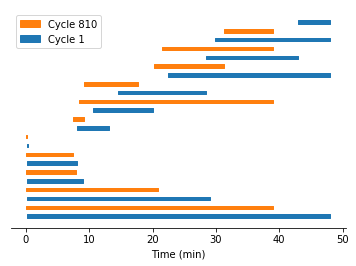

In [62]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

yloc = 0.
for idx, row in bars1.sort_values(by=['birth', 'death'], ascending=[True, False]).iterrows():
    ax3.broken_barh(xranges=[(row['birth'], (row['death']-row['birth']))], yrange=(yloc, 4),
                   color='C0', alpha=1)
#     print(row['death'])
    yloc += 20
#     print(row)
yloc = 10
for idx, row in bars810.sort_values(by=['birth', 'death'], ascending=[True, False]).iterrows():
    ax3.broken_barh(xranges=[(row['birth'], (row['death']-row['birth']))], yrange=(yloc, 4),
                   color="C1", alpha=1, )
#     print(row['death'])
    yloc += 20
ax3.broken_barh(xranges=[(0,0)], yrange=(0,0), color='C1', label='Cycle 810')
ax3.broken_barh(xranges=[(0,0)], yrange=(0,0), color='C0', label='Cycle 1')
# ax3.set_ylim(0, 100)
ax3.set_yticks([])
ax3.set_yticklabels('')
ax3.set_xlabel('Time (min)')
ax3.legend(loc='upper left')
fig3.savefig('./figs/barcd_cmp1810', bbox_inches='tight', dpi=200)

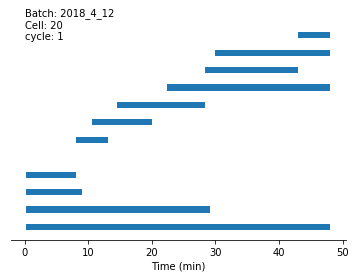

In [242]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

yloc = 0.
for idx, row in bars.sort_values(by=['birth', 'death'], ascending=[True, False]).iterrows():
    ax3.broken_barh(xranges=[(row['birth'], (row['death']-row['birth']))], yrange=(yloc, 7))
#     print(row['death'])
    yloc += 20
#     print(row)
# ax3.set_ylim(0, 100)
ax3.set_yticks([])
ax3.set_yticklabels('')
ax3.set_xlabel('Time (min)')
ax3.text(0, yloc-20, 'Batch: 2018_4_12\nCell: 20\ncycle: '+str(cyc_sel))
fig3.savefig('./figs/barcd_20_'+str(cyc_sel), bbox_inches='tight', dpi=200)

[Text(0,0,'0.27409166666620877'),
 Text(0,0,'0.28740666666659914'),
 Text(0,0,'0.3011616666665456'),
 Text(0,0,'0.3153149999998277'),
 Text(0,0,'0.3305066666662848'),
 Text(0,0,'0.34615666666650213'),
 Text(0,0,'0.3621849999995902'),
 Text(0,0,'0.3793133333330237'),
 Text(0,0,'0.39693333333319364')]

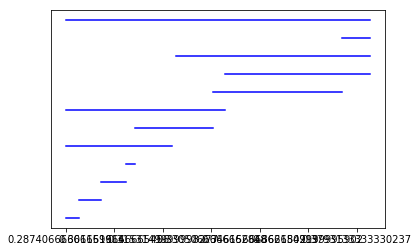

In [48]:
ds.plot.plot_bars(dgms[0], order='birth', show = False)
axt = plt.gca()
axt.set_yticklabels([])
axt.set_yticks([])
axt.set_xticklabels(dyn_grh.index.values)

In [33]:
for z in zz:
    print(' + '.join("%d * (%s)" % (x.element, fz[cells[x.index]]) for x in z))
#     [x.element, f[cells[x.index]], for x in z]
#     print([x.element for x in z])
#     print()

1 * (<4> 0)


In [34]:
zz

Zigzag persistence with 1 alive cycles